# Plotting with Matplotlib

Plotting doesn’t work just with `Pandas` installed. You need to install `Matplotlib` and `Seaborn`

`pip install matplotlib seaborn`

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
covid_df = pd.read_csv('datasets/italy-covid-daywise.csv')

In [18]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [19]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


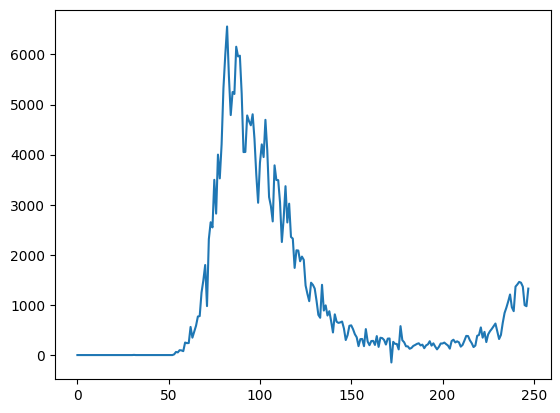

In [20]:
covid_df.new_cases.plot()
plt.show()

**NOTE** that in the above plot, x-axis is the **index** of `covid_df.new_cases` series and y-axis are the values of `covid_df.new_cases`

**NOTE** that this plot only makes sense because the data was ordered in a time-series. Had it been some random values, the graph lines would have been all over the place like below.

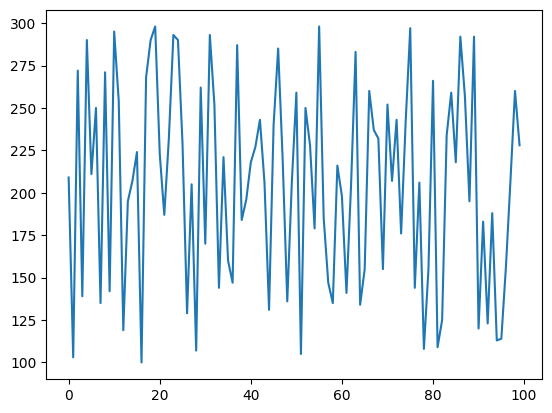

In [21]:
import numpy as np
a = np.random.randint(100,300,size=100)
pd.Series(a).plot()
plt.show()

While the new_cases plot shows us the overall trend, it is not very clear when the peak occurred, as there is no dates on the x-axis. 
we can bring it to the x-axis by setting `date` column as the index of the dataframe. 

In [23]:
covid_df.index

RangeIndex(start=0, stop=248, step=1)

In [24]:
covid_df.set_index('date', inplace=True) # note that date is a string column in our data. not a date dtype

`inplace=True` implies that change will affect the original dataframe, i.e covid_df. By default inplace is set to false which means that after setting index you will have to save in another variable as original df will not be affected.
Notice that the index of a data frame doesn't have to be numeric. Using the date as the index also allows us to get the data for a specific date using `.loc`


In [25]:
covid_df

,new_cases,new_deaths,new_tests
date,,,
2019-12-31,0.0,0.0,NaN
2020-01-01,0.0,0.0,NaN
2020-01-02,0.0,0.0,NaN
2020-01-03,0.0,0.0,NaN
2020-01-04,0.0,0.0,NaN
...,...,...,...
2020-08-30,1444.0,1.0,53541.0
2020-08-31,1365.0,4.0,42583.0
2020-09-01,996.0,6.0,54395.0


In [26]:
covid_df.index # notice the name='date'

Index(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       ...
       '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
       '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
      dtype='object', name='date', length=248)

In [27]:
covid_df.index.name

'date'

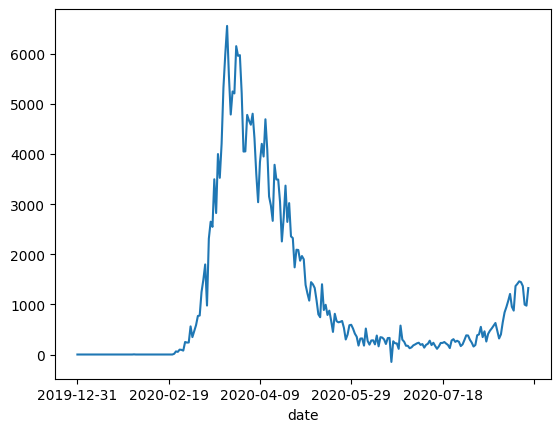

In [28]:
covid_df.new_cases.plot()
# note x-axis values are actual index values(data strings in this case.), not positional integer indexes. haan agar index hai hi integers wali to integer hi dikhenge lekin 
# jo index me integer hai vo hi dikhenge not necessarily 0,1,2,...
plt.show()

In [30]:
covid_df.loc['2020-03-20']

new_cases     5322.0
new_deaths     429.0
new_tests        NaN
Name: 2020-03-20, dtype: float64

In [31]:
covid_df.index #note that date is now the name of the index of the dataframe, not a column

Index(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       ...
       '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
       '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
      dtype='object', name='date', length=248)

In [32]:
covid_df.date #does not work as date is no longer a column of the dataframe. its the name of the index

AttributeError: 'DataFrame' object has no attribute 'date'

use `title` parameter in `.plot()` to set title of the plot at the top center

In [36]:
+ covid_df.new_tests

date
2019-12-31        NaN
2020-01-01        NaN
2020-01-02        NaN
2020-01-03        NaN
2020-01-04        NaN
               ...   
2020-08-30    53541.0
2020-08-31    42583.0
2020-09-01    54395.0
2020-09-02        NaN
2020-09-03        NaN
Name: new_tests, Length: 248, dtype: float64

<Axes: title={'center': 'Positivity rate'}, xlabel='date'>

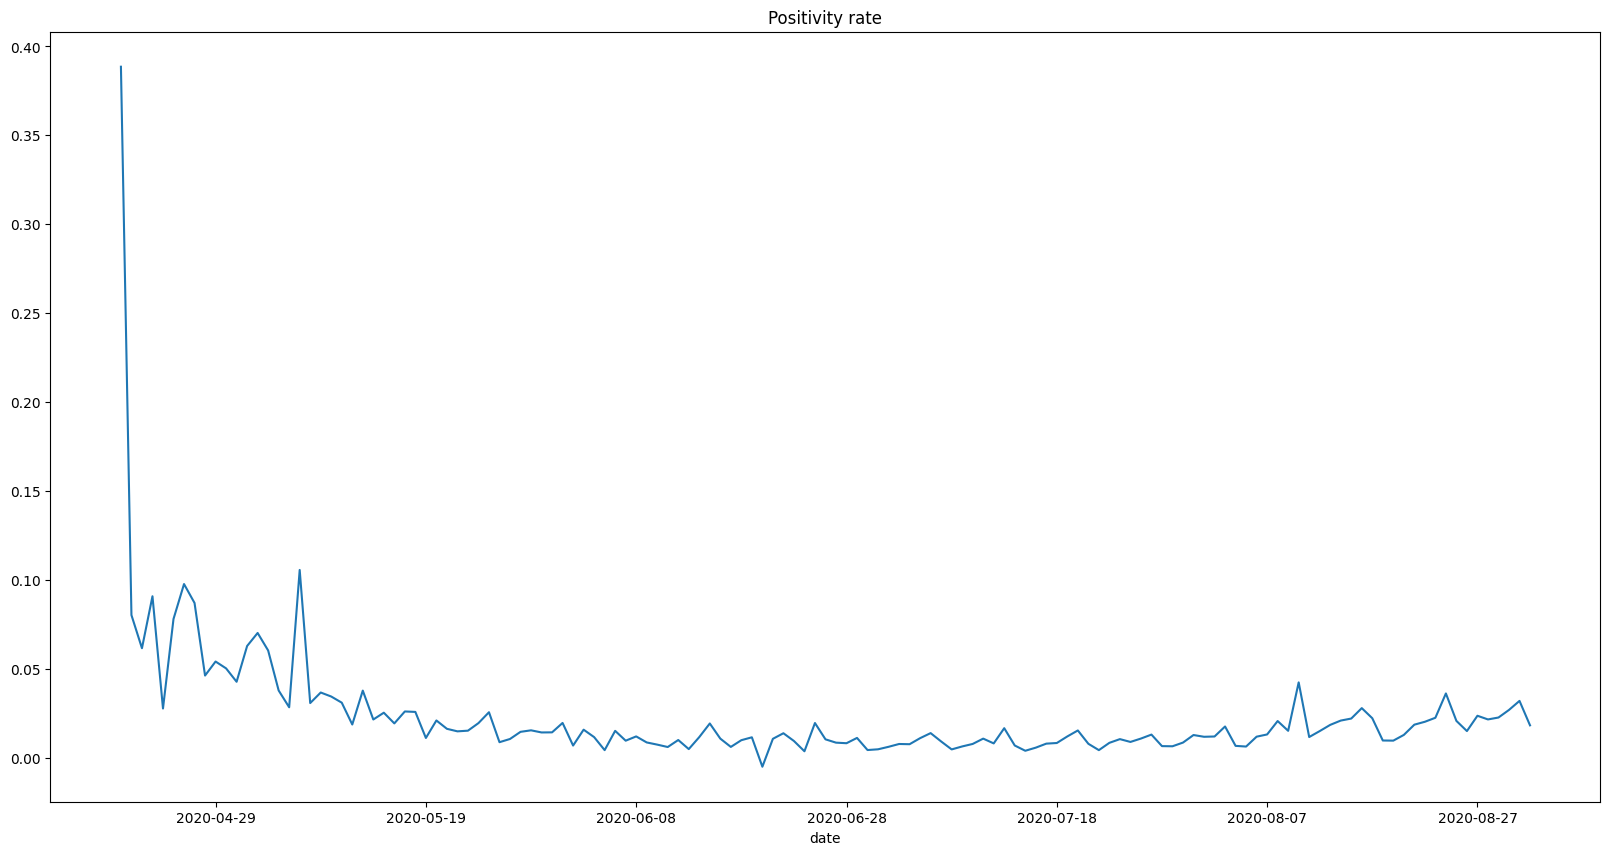

In [38]:
(covid_df.new_cases / (covid_df.new_tests)).plot(title='Positivity rate',figsize=(20,10))

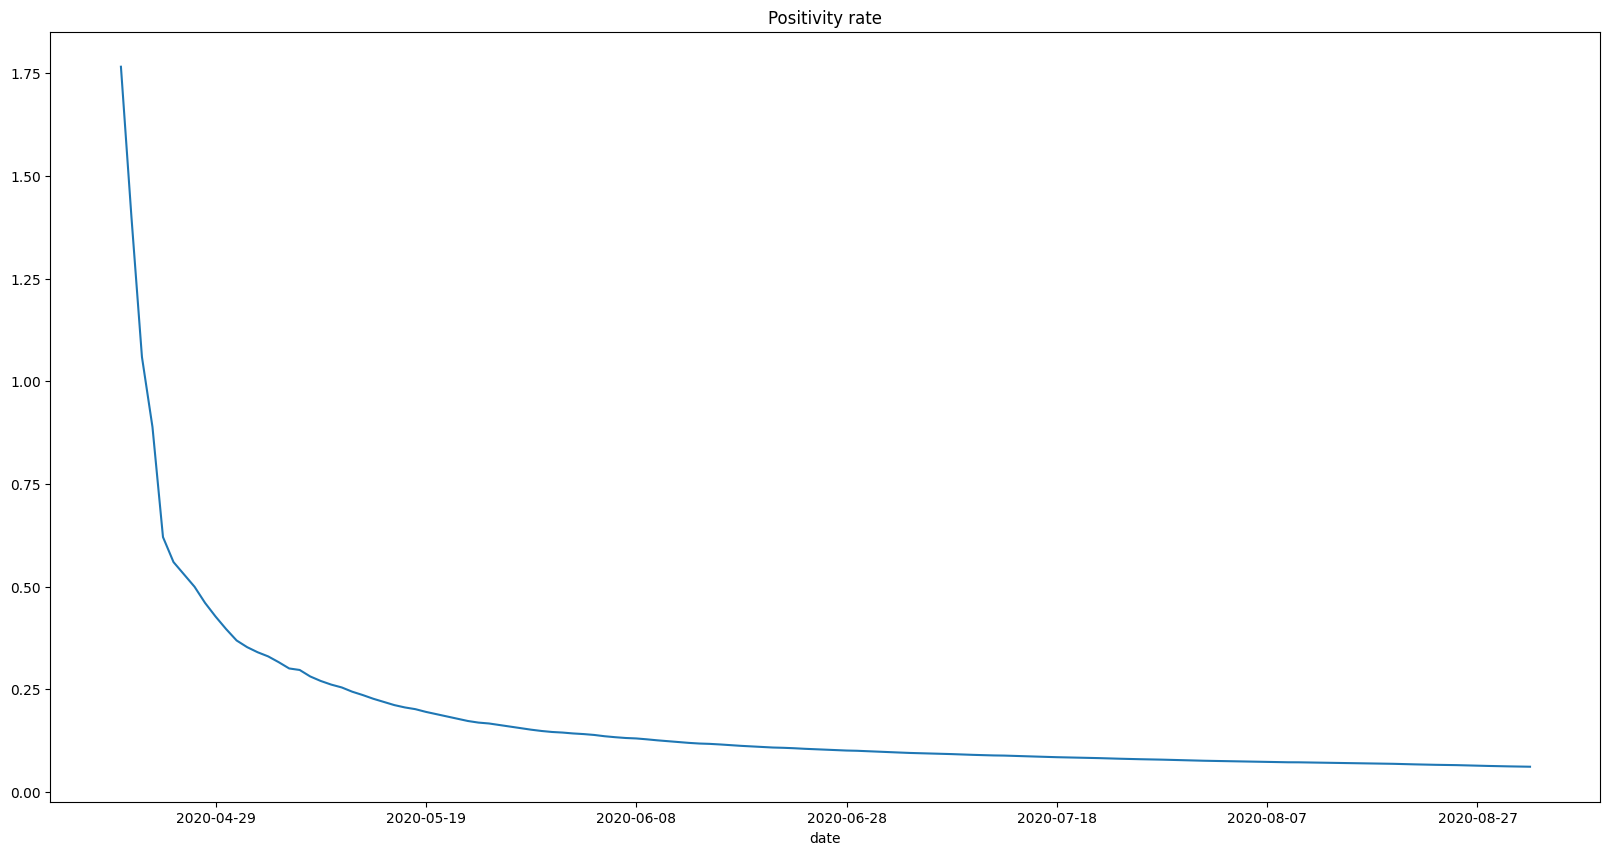

In [40]:
(covid_df.new_cases.cumsum() / (93500 + covid_df.new_tests.cumsum())).plot(title='Positivity rate', figsize=(20,10))
plt.show()
# 93500 is the tests conducted before the collection of this data began. 

### Data Visualization:
Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. We'll use the `matplotlib.pyplot` module for basic plots like line & bar charts. It is often imported with the alias `plt`. We'll use the `seaborn` module for more advanced plots. It is commonly imported with the alias `sns`.


**NOTE**: `%matplotlib inline` to ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.

**NOTE**:
`plt.close()` will close the figure window entirely, where `plt.clf()` will just clear the figure - you can still paint another plot onto it.


### Line Chart / line plots
The line chart is one of the simplest and most widely used data visualization techniques. A line chart displays information as a series of data points or markers connected by straight lines. You can customize the shape, size, color, and other aesthetic elements of the lines and markers for better visual clarity.

Line plots are great for visualizing changes in numeric variable over time.


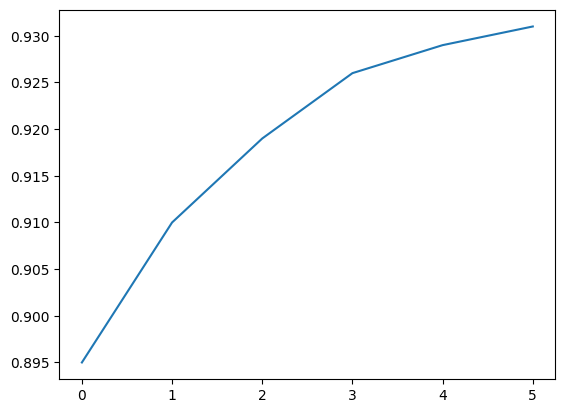

In [63]:
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
plt.plot(yield_apples);plt.show()
# plt.plot(var)  here var is a iterable and its values come on y axis and the indexes come on x-axis.

Lets enhance this plot and make it more informative.

**Customizing the X-axis**
The X-axis of the plot currently shows list element indexes 0 to 5. The plot would be more informative if we could display the year for which we're plotting the data. 

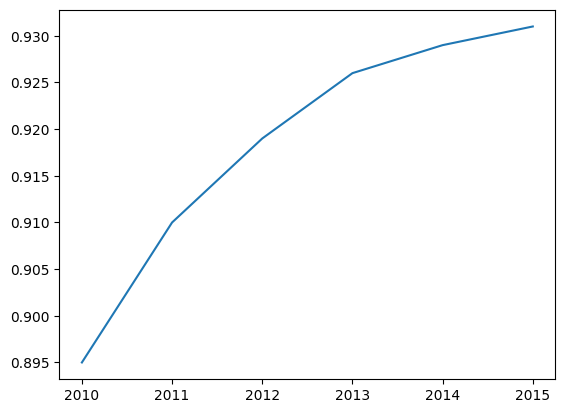

In [66]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
plt.plot(years, yield_apples) #plt.plot(x,y)
plt.show()

**Axis Labels**
We can add labels to the axes to show what each axis represents using the `plt.xlabel()` and `plt.ylabel()` methods.

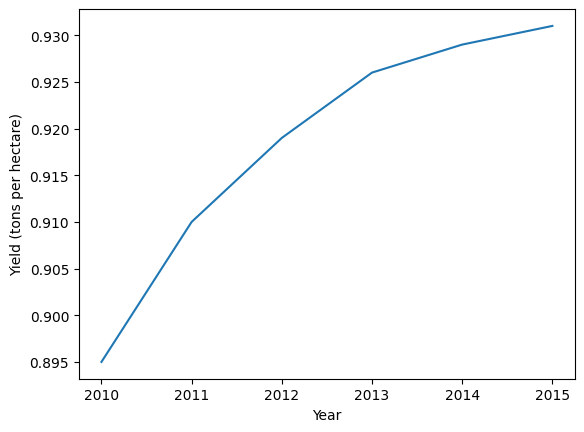

In [71]:
plt.plot(years, yield_apples)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.show()

**NOTE**: that we capitalize axis labels as we would **capitalize** a sentence, where only the first word is always capitalized and subsequent words are capitalized only if they are proper nouns.

**NOTE**: Always plot/specify your axes.

We can also plot using the dataframe object.

`df.plot(x=’x_attribute’,y=’y_attribute’,kind=’line’, rot=45)`

<Axes: xlabel='date'>

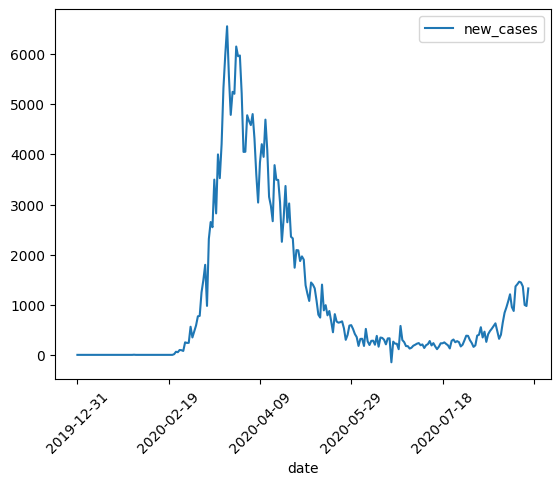

In [81]:
covid_df.plot(y="new_cases", kind='line', rot=45)
# kind='line' by default
# index of the dataframe is the x-axis because we didnt explicitly pass x argument

`rot` parameter changes the angle of the labels (rotation) on the x-axis so they are easier to read and display.

<Axes: xlabel='date'>

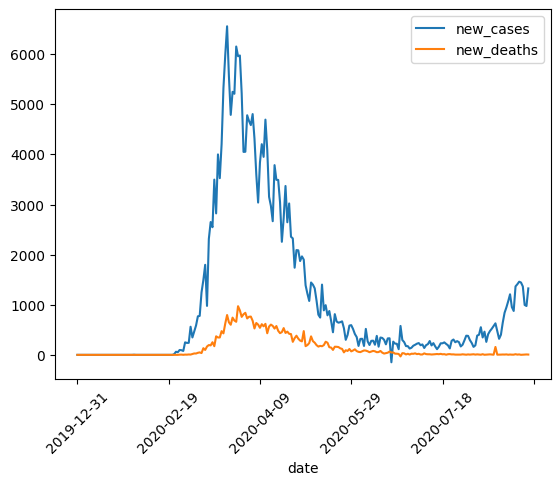

In [82]:
covid_df.plot(y=["new_cases", "new_deaths"], kind='line', rot=45)
# multiple columns provided for y-axis as a list

<Axes: xlabel='new_cases', ylabel='new_deaths'>

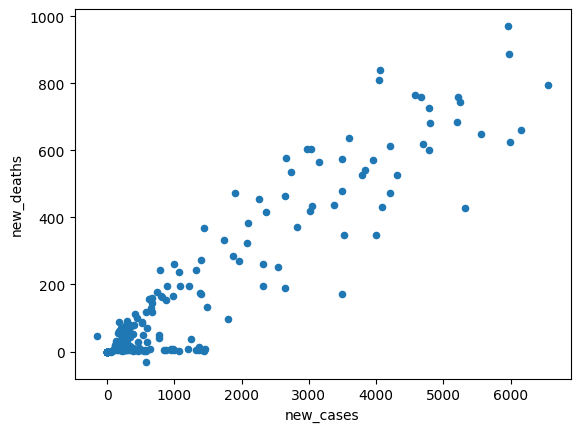

In [84]:
covid_df.plot(x="new_cases", y="new_deaths", kind='scatter')

So, we have seen that `.plot()` works on Series object, dataframe object and through `plt` package
```
>>>covid_df.new_cases.plot()
>>>covid_df.plot(x="new_cases", y="new_deaths", kind='scatter')
>>>plt.plot(covid_df.new_cases, covid_df.new_deaths)
```

**NOTE**: x and y MUST be of the same length no matter which above method you use. you cannot have x with 5 elements(length=5) and y with 3 elements(length=3)

**Plotting Multiple Lines**

You can invoke the `plt.plot()` function once for each line to plot multiple lines in the same graph.

Let's compare the yields of apples vs. oranges in Kanto.

In [1]:
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896]
len(apples), len(oranges)

(12, 12)

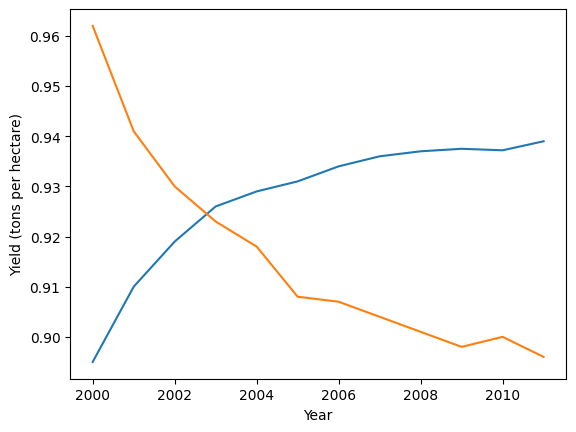

In [5]:
plt.plot(years, apples)
plt.plot(years, oranges)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.show()

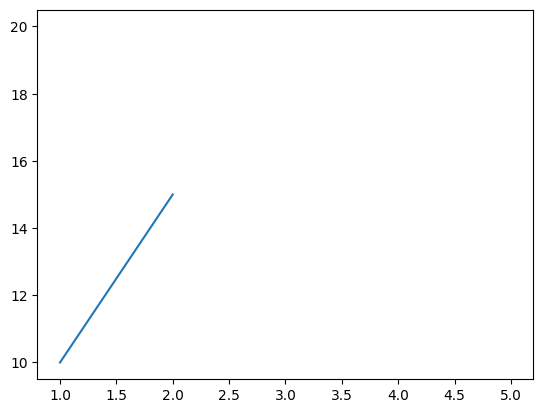

In [105]:
x = [1, 2, 3, 4, 5]
y = [10, 15, np.nan, np.nan, 20]
plt.plot(x,y)
plt.show()
# x and y are of SAME length = 5 even though y have 2 nan values we are able to get a plot. had y=[10,15,20] we would get error as lengths of x and y would be different.

**Chart Title and Legend**

To differentiate between multiple lines, we can include a legend within the graph using the `plt.legend()` function. We can also set a title for the chart using the `plt.title()` function

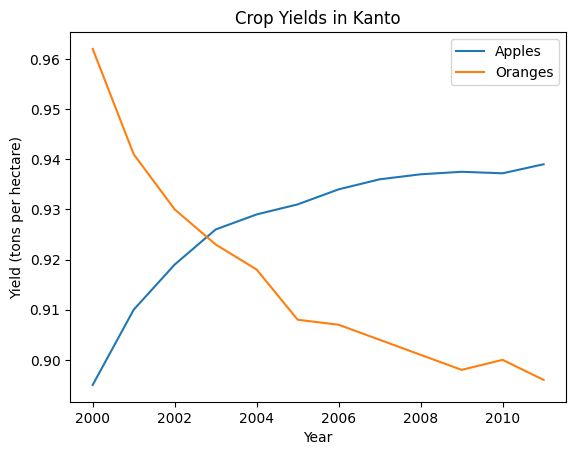

In [6]:
plt.plot(years, apples)
plt.plot(years, oranges)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yields in Kanto')
plt.legend(['Apples', 'Oranges'])
plt.show()

**NOTE**: `plt.legend()` and `plt.title()` must come after `plt.plot()` or `plt.bar()` or any plotting method only. Not before plotting.

## TO DO
- fig, ax = plt.subplots() # see stat learning ch2 lab
- fig.set_size_inches(12,3)
- ax.contour() # see stat learning ch2 lab
- If we want to save the figure that contains a given axes, we can find the relevant figure by accessing the `figure` attribute:
```
fig = ax.figure
fig.savefig('horsepower_mpg.png');
```

In [1]:
import matplotlib.pyplot as plt

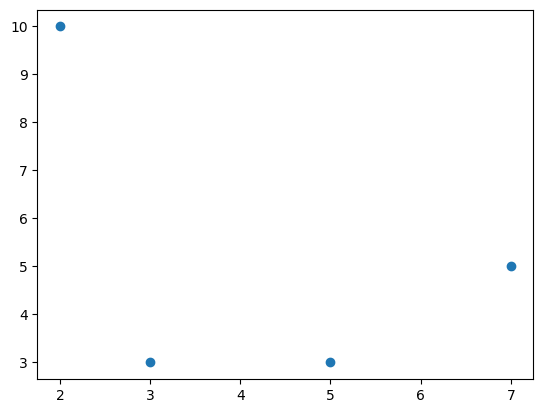

In [11]:
plt.plot([2,5, 7,3], [10,3, 5, 3], "o")

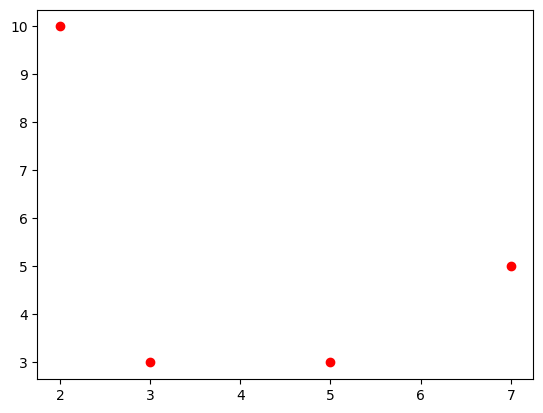

In [12]:
plt.scatter([2,5, 7,3], [10,3, 5, 3], marker='o', c='r')